In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (1).zip to archive (1).zip


In [ ]:
import zipfile
import io
with zipfile.ZipFile(io.BytesIO(uploaded['archive (1).zip']), 'r') as zip_ref:
    zip_ref.extractall('extracted_files')

In [ ]:
import os
os.listdir('extracted_files')

['PS_20174392719_1491204439457_log.csv']

In [ ]:
df = pd.read_csv('extracted_files/PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df['type'].value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [ ]:
df['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


In [ ]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [ ]:
df[(df['type']=='TRANSFER') | (df['type']=='PAYEMENT')]['isFraud'].value_counts()

,count
isFraud,
0,528812
1,4097


In [ ]:
df=df.drop('isFlaggedFraud',axis=1)

In [ ]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [ ]:
df = df[df['type'].isin(['TRANSFER', 'PAYMENT'])]

In [ ]:
df.shape

(2684404, 10)

In [ ]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.00,C1812552860,0.0,0.0,1
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.00,C1470998563,0.0,0.0,1
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.00,C1850423904,0.0,0.0,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.0,0.0,1


In [ ]:
df['hour'] = df['step'] % 24  # Extract hour from step (since 1 step = 1 hour)
df['is_night'] = df['hour'].apply(lambda x: 1 if x < 6 else 0)  # Flag night transactions

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,hour,is_night
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,1,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,1,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,1,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,1,1
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,1,1


In [ ]:
df['amount_ratio'] = df['amount'] / (df['oldbalanceOrg'] + 1)  # Avoid division by zero

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,hour,is_night,amount_ratio
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,1,1,0.057834
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,1,1,0.087731
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,1,1,0.994505
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,1,1,0.280788
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,1,1,0.145146


In [ ]:
df['sender_balance_change'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['receiver_balance_change'] = df['newbalanceDest'] - df['oldbalanceDest']

In [ ]:
df[df['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,hour,is_night,amount_ratio,sender_balance_change,receiver_balance_change
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,1,1,0.994505,181.00,0.0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,1,1,0.999644,2806.00,0.0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,1,1,0.999950,20128.00,0.0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,1,1,0.999999,1277212.77,0.0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,1,1,0.999971,35063.63,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.0,0.0,1,22,0,0.999984,63416.99,0.0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.0,1,23,0,0.999999,1258818.82,0.0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.0,1,23,0,0.999997,339682.13,0.0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.0,1,23,0,1.000000,6311409.28,0.0


In [ ]:
df['orig_balance_zero'] = (df['oldbalanceOrg'] == 0).astype(int)
df['dest_balance_zero'] = (df['oldbalanceDest'] == 0).astype(int)

In [ ]:
df.sample(4)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,hour,is_night,amount_ratio,sender_balance_change,receiver_balance_change,orig_balance_zero,dest_balance_zero
1478334,141,PAYMENT,9413.30,C539803202,50129.0,40715.7,M122932566,0.00,0.00,0,21,0,0.187778,9413.3,0.00,0,1
4011875,299,PAYMENT,4398.97,C96255966,0.0,0.0,M1631745083,0.00,0.00,0,11,0,4398.970000,0.0,0.00,1,1
2415715,202,TRANSFER,479565.08,C245286034,0.0,0.0,C583568364,2012099.25,2491664.33,0,10,0,479565.080000,0.0,479565.08,1,0
732481,37,PAYMENT,32295.61,C450253835,10889.0,0.0,M1665073726,0.00,0.00,0,13,0,2.965621,10889.0,0.00,0,1


In [ ]:
df[df['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,hour,is_night,amount_ratio,sender_balance_change,receiver_balance_change,orig_balance_zero,dest_balance_zero
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,1,1,0.994505,181.00,0.0,0,1
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,1,1,0.999644,2806.00,0.0,0,1
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,1,1,0.999950,20128.00,0.0,0,1
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,1,1,0.999999,1277212.77,0.0,0,1
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,1,1,0.999971,35063.63,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.0,0.0,1,22,0,0.999984,63416.99,0.0,0,1
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.0,1,23,0,0.999999,1258818.82,0.0,0,1
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.0,1,23,0,0.999997,339682.13,0.0,0,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.0,1,23,0,1.000000,6311409.28,0.0,0,1


In [ ]:
dummies=pd.get_dummies(df['type']).astype(int)
dummies.tail()

,PAYMENT,TRANSFER
6362610,0,1
6362612,0,1
6362614,0,1
6362616,0,1
6362618,0,1


In [ ]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [ ]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,hour,is_night,amount_ratio,sender_balance_change,receiver_balance_change,orig_balance_zero,dest_balance_zero,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,1,1,0.057834,9839.64,0.0,0,1,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,1,1,0.087731,1864.28,0.0,0,1,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,1,1,0.994505,181.00,0.0,0,1,True
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,1,1,0.280788,11668.14,0.0,0,1,False
5,1,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,1,1,0.145146,7817.71,0.0,0,1,False


In [ ]:
df['type_TRANSFER'] = df['type_TRANSFER'].astype(int)
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,hour,is_night,amount_ratio,sender_balance_change,receiver_balance_change,orig_balance_zero,dest_balance_zero,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,1,1,0.057834,9839.64,0.0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,1,1,0.087731,1864.28,0.0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,1,1,0.994505,181.00,0.0,0,1,1
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,1,1,0.280788,11668.14,0.0,0,1,0
5,1,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,1,1,0.145146,7817.71,0.0,0,1,0


In [ ]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [ ]:
df.shape

(2684404, 15)

In [ ]:
df.sample(10)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,hour,is_night,amount_ratio,sender_balance_change,receiver_balance_change,orig_balance_zero,dest_balance_zero,type_TRANSFER
4243625,306,6824.46,0.0,0.00,0.0,0.0,0,18,0,6824.460000,0.00,0.0,1,1,0
3991220,298,47069.65,3449.0,0.00,0.0,0.0,0,10,0,13.643377,3449.00,0.0,0,1,0
5512995,380,2585.09,696.0,0.00,0.0,0.0,0,20,0,3.708881,696.00,0.0,0,1,0
2102477,182,25612.99,0.0,0.00,0.0,0.0,0,14,0,25612.990000,0.00,0.0,1,1,0
5891836,403,5778.73,0.0,0.00,0.0,0.0,0,19,0,5778.730000,0.00,0.0,1,1,0
6203795,585,3746.47,48958.0,45211.53,0.0,0.0,0,9,0,0.076523,3746.47,0.0,0,1,0
3973452,297,30652.10,16406.0,0.00,0.0,0.0,0,9,0,1.868233,16406.00,0.0,0,1,0
1025087,48,4250.83,538.0,0.00,0.0,0.0,0,0,1,7.886512,538.00,0.0,0,1,0
3540531,260,17331.23,21497.0,4165.77,0.0,0.0,0,20,0,0.806179,17331.23,0.0,0,1,0
601957,34,2523.56,0.0,0.00,0.0,0.0,0,10,0,2523.560000,0.00,0.0,1,1,0


<Axes: >

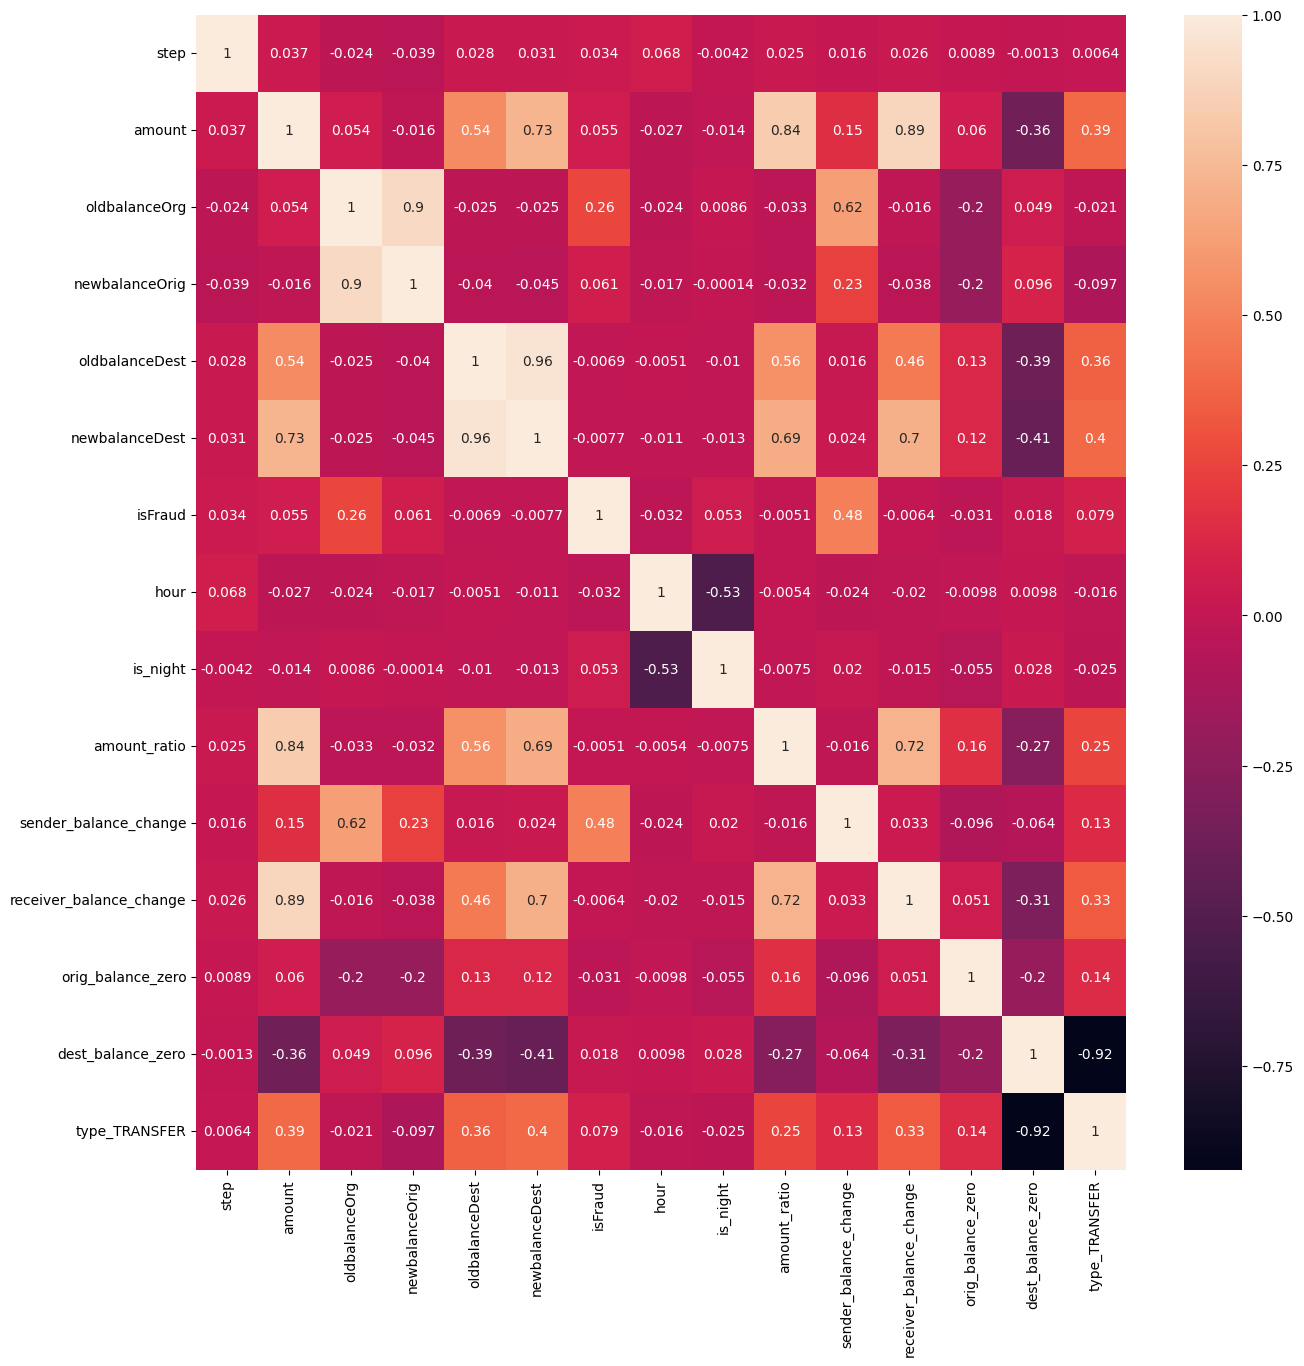

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr ,annot=True)

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,hour,is_night,amount_ratio,sender_balance_change,receiver_balance_change,orig_balance_zero,dest_balance_zero,type_TRANSFER
count,2.684404e+06,2.684404e+06,2.684404e+06,2.684404e+06,2.684404e+06,2.684404e+06,2.684404e+06,2.684404e+06,2.684404e+06,2.684404e+06,2.684404e+06,2.684404e+06,2.684404e+06,2.684404e+06,2.684404e+06
mean,2.448306e+02,1.912474e+05,6.548221e+04,5.160422e+04,5.097222e+05,7.056541e+05,1.526223e-03,1.535208e+01,2.670909e-02,1.020612e+05,1.387800e+04,1.959319e+05,3.937664e-01,8.257431e-01,1.985204e-01
std,1.431616e+02,9.108498e+05,2.649473e+05,2.125782e+05,2.878561e+06,3.583985e+06,3.903709e-02,4.676800e+00,1.612319e-01,7.723748e+05,1.169518e+05,1.184107e+06,4.885842e-01,3.793303e-01,3.988861e-01
min,1.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.462010e-07,0.000000e+00,-6.755514e+06,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,5.501128e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01,0.000000e+00,2.020453e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,2.490000e+02,1.270320e+04,7.030000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,6.853779e+00,1.650680e+03,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,3.450000e+02,3.276679e+04,5.228100e+04,3.089579e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.900000e+01,0.000000e+00,9.618353e+03,1.058907e+04,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.553805e+08,3.560159e+08,1.000000e+00,2.300000e+01,1.000000e+00,9.244552e+07,1.000000e+07,1.056878e+08,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
X=df.drop('isFraud',axis=1)
y=df['isFraud']

In [ ]:
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,hour,is_night,amount_ratio,sender_balance_change,receiver_balance_change,orig_balance_zero,dest_balance_zero,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.0,0.0,1,1,0.057834,9839.64,0.0,0,1,0
1,1,1864.28,21249.00,19384.72,0.0,0.0,1,1,0.087731,1864.28,0.0,0,1,0
2,1,181.00,181.00,0.00,0.0,0.0,1,1,0.994505,181.00,0.0,0,1,1
4,1,11668.14,41554.00,29885.86,0.0,0.0,1,1,0.280788,11668.14,0.0,0,1,0
5,1,7817.71,53860.00,46042.29,0.0,0.0,1,1,0.145146,7817.71,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,63416.99,63416.99,0.00,0.0,0.0,22,0,0.999984,63416.99,0.0,0,1,1
6362612,743,1258818.82,1258818.82,0.00,0.0,0.0,23,0,0.999999,1258818.82,0.0,0,1,1
6362614,743,339682.13,339682.13,0.00,0.0,0.0,23,0,0.999997,339682.13,0.0,0,1,1
6362616,743,6311409.28,6311409.28,0.00,0.0,0.0,23,0,1.000000,6311409.28,0.0,0,1,1


In [ ]:
y


,isFraud
0,0
1,0
2,1
4,0
5,0
...,...
6362610,1
6362612,1
6362614,1
6362616,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,shuffle=True)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2013303, 14), (671101, 14), (2013303,), (671101,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.11740631,  0.02550296, -0.23807271, ...,  1.24078014,
        -2.17655541,  2.00964526],
       [ 0.39949745, -0.19588309, -0.2166288 , ..., -0.80594456,
         0.45944155, -0.49760026],
       [-0.22916929, -0.20482755, -0.23807271, ...,  1.24078014,
         0.45944155, -0.49760026],
       ...,
       [ 1.04213456,  0.08556266, -0.15567094, ..., -0.80594456,
        -2.17655541,  2.00964526],
       [ 0.89544566, -0.18880476, -0.19843462, ..., -0.80594456,
         0.45944155, -0.49760026],
       [ 0.88846047,  0.84042163, -0.19862663, ..., -0.80594456,
        -2.17655541,  2.00964526]])

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=10000)

In [ ]:
lr.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred1=lr.predict(X_test_scaled)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report

acc_score=accuracy_score(y_test,y_pred1)
print(f"accuracy score :{acc_score} ")
print()
print("Confusion matrix :")
print(confusion_matrix(y_test,y_pred1))
print()
print("Classification Report :")
print(classification_report(y_test,y_pred1))

accuracy score :0.9996334381859064 

Confusion matrix :
[[670048      6]
 [   240    807]]

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    670054
           1       0.99      0.77      0.87      1047

    accuracy                           1.00    671101
   macro avg       1.00      0.89      0.93    671101
weighted avg       1.00      1.00      1.00    671101



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier(max_depth=5,class_weight={0: 1, 1: 10})

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 10}, max_depth=5)

[Text(0.5260416666666666, 0.9166666666666666, 'x[9] <= 434002.766\ngini = 0.029\nsamples = 2013303\nvalue = [2010253, 30500]'),
 Text(0.2604166666666667, 0.75, 'x[9] <= 71216.309\ngini = 0.015\nsamples = 2007775\nvalue = [2006286, 14890]'),
 Text(0.39322916666666663, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'x[0] <= 718.5\ngini = 0.005\nsamples = 1958702\nvalue = [1958205, 4970]'),
 Text(0.08333333333333333, 0.4166666666666667, 'x[13] <= 0.5\ngini = 0.005\nsamples = 1958688\nvalue = [1958205, 4830]'),
 Text(0.041666666666666664, 0.25, 'gini = 0.0\nsamples = 1612276\nvalue = [1612276, 0]'),
 Text(0.125, 0.25, 'x[5] <= 57.855\ngini = 0.027\nsamples = 346412\nvalue = [345929, 4830]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.225\nsamples = 1178\nvalue = [704, 4740]'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.001\nsamples = 345234\nvalue = [345225, 90]'),
 Text(0.16666666666666666, 0.4166666666666667, 'gini = 0.0\nsamples = 14\nvalue

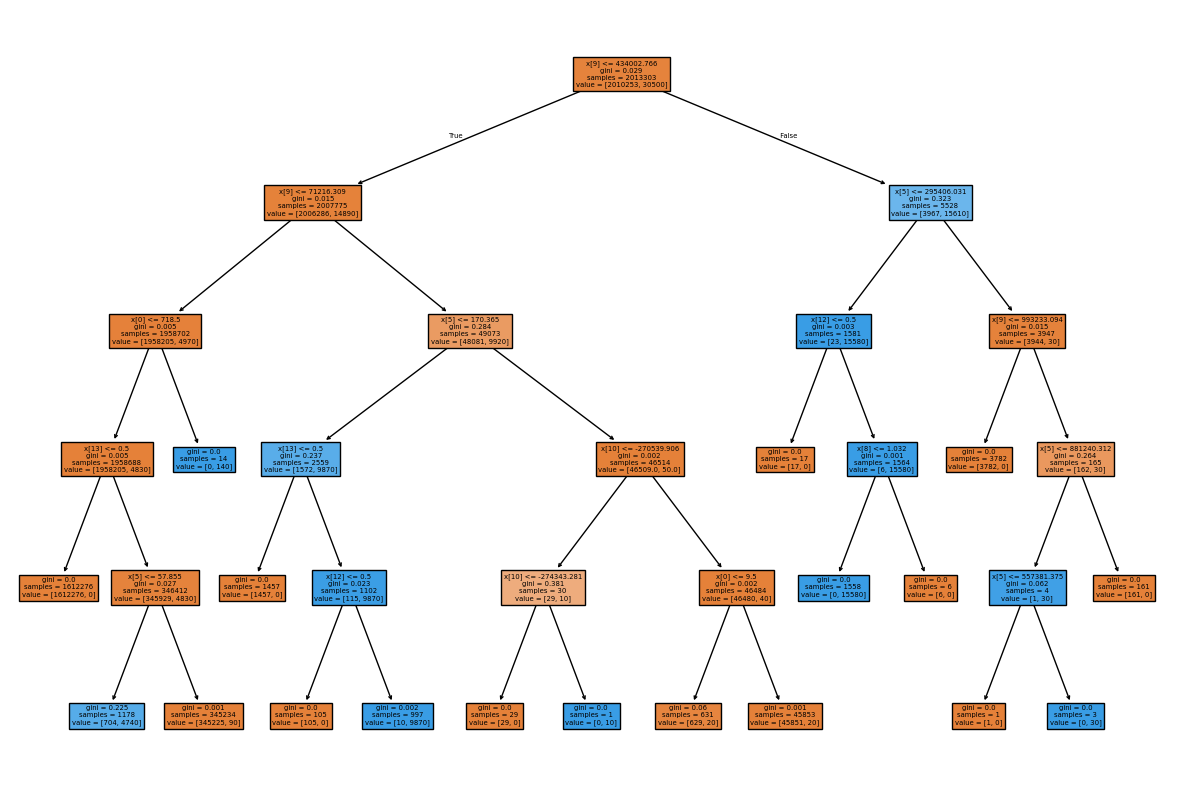

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)

In [ ]:
dt.get_depth()

5

In [ ]:
y_pred=dt.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report

In [ ]:
acc_score=accuracy_score(y_test,y_pred)
print(f"accuracy score :{acc_score} ")
print()
print("Confusion matrix :")
print(confusion_matrix(y_test,y_pred))
print()
print("Classification Report :")
print(classification_report(y_test,y_pred))

accuracy score :0.9996334381859064 

Confusion matrix :
[[669812    242]
 [     4   1043]]

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    670054
           1       0.81      1.00      0.89      1047

    accuracy                           1.00    671101
   macro avg       0.91      1.00      0.95    671101
weighted avg       1.00      1.00      1.00    671101



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100,class_weight={0: 1, 1: 10}, random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 10}, random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
acc_score=accuracy_score(y_test,y_pred)*100
print(f"accuracy score :{acc_score} %")
print()
print("Confusion matrix :")
print(confusion_matrix(y_test,y_pred))
print()
print("Classification Report :")
print(classification_report(y_test,y_pred))

accuracy score :99.99985099113248 %

Confusion matrix :
[[670054      0]
 [     1   1046]]

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    670054
           1       1.00      1.00      1.00      1047

    accuracy                           1.00    671101
   macro avg       1.00      1.00      1.00    671101
weighted avg       1.00      1.00      1.00    671101



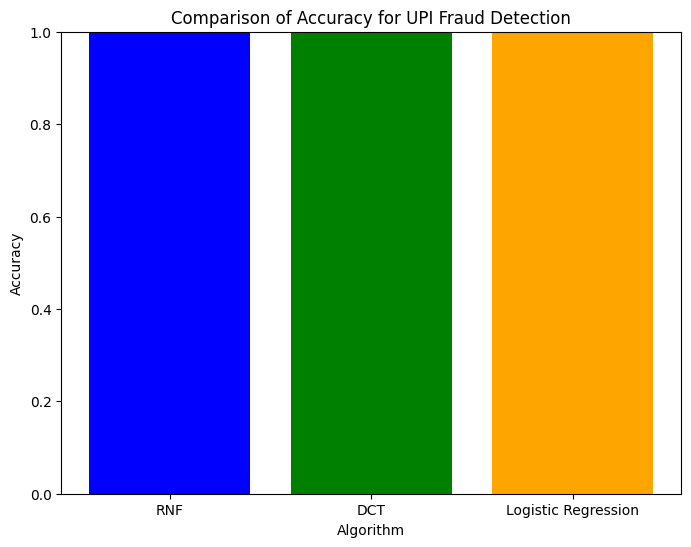

In [ ]:
import matplotlib.pyplot as plt



rnf_accuracy =0.9999985099113248
dct_accuracy = 0.9996334381859064
logistic_accuracy = 0.9996334381859064

algorithms = ['RNF', 'DCT', 'Logistic Regression']


plt.figure(figsize=(8, 6))
plt.bar(algorithms, [rnf_accuracy, dct_accuracy, logistic_accuracy], color=['blue', 'green', 'orange'])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy for UPI Fraud Detection')
plt.ylim(0, 1) # Set y-axis limit to 0-1 for accuracy
plt.show()